In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Lab 11
## K. Surya Prakash
## EE18BTECH11026

# Problem 01

# Problem 02

In [3]:
X = np.loadtxt('saveX.mat') ## n*N
Y = np.loadtxt('saveY.mat') ## n*M

def find_card(a):  ### Finds the cardinality : no. of non-zero values in a :: non-zero := abs(ai) >= 1e-4
    a_bool = np.abs(a) >= 1e-4    
    return a_bool,int(sum(a_bool))


### Formulation..

In [12]:
lamda_list = np.geomspace(0.1, 50.0, num=100) ### lamda spaced b/w 0.1 & 50

#### Variable init

n,N = np.shape(X)
n,M = np.shape(Y)

a = cp.Variable((n,1))
i_x = np.ones((N,1))
i_y = np.ones((M,1))

b = cp.Variable()

#### Constraints...
constraints = [(X.T)@a - b*i_x >= 1,(Y.T)@a -b*i_y <= -1 ]

#### Collecting thickness & card for each lamda
slab_thick = [0]*len(lamda_list)
card = [0]*len(lamda_list)

flag = True
### Solving the prob for diff lamda
for i, _lam in enumerate(lamda_list):
    obj = cp.Minimize( cp.norm(a, 2) + _lam*cp.norm(a, 1))
    prob = cp.Problem(obj, constraints)
    prob.solve()
    slab_thick[i] = 2/(cp.norm(a, 2).value)
    _,card[i] = find_card(a.value)
    
    if(card[i] == 10 and flag == True):
        print("card: 10 first achieved @ lamda = ", _lam)
        print("Slab thickness here (with 50 dim a) : ",slab_thick[i])
        print('\n')
        a_bool,_ = find_card(a.value)
        flag = False

#print(lamda_list)
print("Cardinality for different lamda values\n")
print(card)



print("\nThe max thickness of the slab is  %.3f and is achieved at lamda = %.3f " %(slab_thick[0],lamda_list[0]))

card: 10 first achieved @ lamda =  23.540849185135322
Slab thickness here (with 50 dim a) :  77.02461928034643


Cardinality for different lamda values

[35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 32, 32, 31, 31, 31, 30, 30, 30, 28, 28, 27, 27, 27, 27, 26, 26, 26, 25, 25, 23, 23, 23, 22, 22, 22, 21, 20, 19, 18, 18, 16, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

The max thickness of the slab is  112.904 and is achieved at lamda = 0.100 


Text(0.5, 1.0, 'Obtained thickness & cardinality for various lamda')

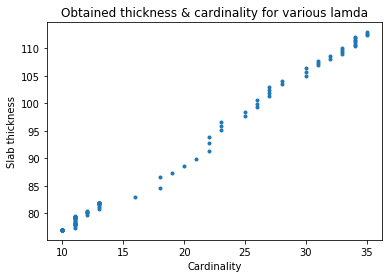

In [10]:
plt.scatter(card,slab_thick, marker = '.')
plt.xlabel('Cardinality')
plt.ylabel('Slab thickness')
plt.title('Obtained thickness & cardinality for various lamda')

In [9]:
a_bool = a_bool.reshape(a_bool.size)  ### has true for important features
principle_feat_indices = np.where(a_bool == True)[0]
print('Extracted feat dim index' ,principle_feat_indices)
### Extracting important features from data
X_reduced = X[principle_feat_indices,:]
Y_reduced = Y[principle_feat_indices,:]

Extracted feat dim index [ 0  6  7 17 18 20 22 25 26 45]


In [7]:
#### Solving the same problem with reduced dimension data

n,N = np.shape(X_reduced)
n,M = np.shape(Y_reduced)

a = cp.Variable((n,1))
i_x = np.ones((N,1))
i_y = np.ones((M,1))

b = cp.Variable()

#### Constraints...
constraints = [(X_reduced.T)@a - b*i_x >= 1,(Y_reduced.T)@a -b*i_y <= -1 ]
obj = cp.Minimize( cp.norm(a, 2) )
prob = cp.Problem(obj, constraints)
prob.solve()


print("Slab thickness (with 10 dim a) = ",2/(cp.norm(a, 2).value))

Slab thickness (with 10 dim a) =  78.46967629764835


### Observations..

# Problem :03



### 3. a) Why a quasi convex problem ?

In [ ]:
f:= (Ax + b) /(c.T x+d) ----> A linear fractional func ===>>> A Quasi convex function ; dem being positive
g(x) := |Ax + b -y| <= t*|c.Tx + d| ; a 2nd order convex cone constraint..  

Since its an intersection of a euclidean ball and a half space ===>  Convex sublevel sets 

Hence the problem is a quasi convex problem and solved using bisection method !!!

### 3 b) Code & results

In [14]:

### Creating data

P1 = np.array([[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0]])


P2 = np.array([[1,0,0,0],
               [0,0,1,0],
               [0,-1,0,10]])

P3 = np.array([[1,1,1,-10],
               [-1,1,1,0],
               [-1,-1,1,10]])

P4 = np.array([[0,1,1,0],
               [0,-1,1,0],
               [-1,0,0,10]])

y1 = np.array([[.98, .93]]).T

y2 = np.array([[1.01, 1.01]]).T

y3 = np.array([[.95, 1.05]]).T

y4 = np.array([[2.04, 0]]).T


### Extracting A,b,c,d from P matrices
def extract(P):
    A = P[0:2,0:3]
    b = P[0:2,3:4]
    c = P[2:3,0:3].T
    d = P[2:3,3:4]

    return A,b,c,d
    
A1,b1,c1,d1 = extract(P1)
A2,b2,c2,d2 = extract(P2)
A3,b3,c3,d3 = extract(P3)
A4,b4,c4,d4 = extract(P4)


In [15]:
x = cp.Variable((3,1))

u = 1
l = 0
eps = 1e-4

f1 = (A1@x + b1)
f2 = (A2@x + b2)
f3 = (A3@x + b3)
f4 = (A4@x + b4)

res1 = cp.norm(f1-(c1.T@x + d1)*y1)
res2 = cp.norm(f2-(c2.T@x + d2)*y2)
res3 = cp.norm(f3-(c3.T@x + d3)*y3)
res4 = cp.norm(f4-(c4.T@x + d4)*y4)


######################### 
######  Sanity check to ensure there is a soln in the spocified [u,l] range!!
##########################
t = u

obj = cp.Minimize(0)
constraints = [res1 <= (c1.T@x + d1)*t,
               res2 <= (c2.T@x + d2)*t,
               res3 <= (c3.T@x + d3)*t,
               res4 <= (c4.T@x + d4)*t]
prob = cp.Problem(obj, constraints)
prob.solve()

if (prob.status != 'optimal'):
    print(" Solution does not exist in [l,u] -- > increase u")



else : 

    #### Bisection method : 
    while (u-l > eps):

        t = (u+l)/2
        constraints = [res1 <= (c1.T@x + d1)*t,
                   res2 <= (c2.T@x + d2)*t,
                   res3 <= (c3.T@x + d3)*t,
                   res4 <= (c4.T@x + d4)*t]

        prob = cp.Problem(obj, constraints)
        prob.solve()

        if (prob.status == 'optimal'):
            u = t
            x_opt = x.value
            t_opt = t
        else: 
            l = t

    print('Minimum value of g(x): t = ',t_opt)
    print('\nx value for optimum g is:\n',x_opt)


Minimum value of g(x): t =  0.04949951171875

x value for optimum g is:
 [[4.91286976]
 [5.01665726]
 [5.19803717]]


### Results